# Detecção e caracterização de gases via Espectroscopia Fotoacustica
## EDA e ML com sinais simulados
#### Joel Cassa Neto
#### 01/06/2025

## 1. Importação
#### Bibliotecas:
- pandas
- os
- matplotlib
- seaborn

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregar o Dataset

In [5]:
# Configurações para melhores visualizações
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5) # Definir um tamanho padrão para os gráficos

# Caminho para o arquivo CSV gerado

path_do_dataset = os.path.join('..', 'data', 'dataset_fotoacustico_misturas_balanceado.csv')

# Carregar o dataset
if os.path.exists(path_do_dataset):
    df = pd.read_csv(path_do_dataset)
    print("Dataset carregado com sucesso!")
else:
    print(f"ERRO: Dataset não encontrado em {path_do_dataset}")
    print("Verifique se o notebook de geração de dados foi executado e o arquivo CSV foi salvo corretamente.")
    raise FileNotFoundError(f"Dataset não encontrado em {path_do_dataset}")

Dataset carregado com sucesso!


## 2.1 Definição de constantes e funções do projeto.

In [6]:
# --- 1. Definição de COMPRIMENTOS_ONDA_VARREDURA ---
# Comprimentos de onda usados na simulação do espectro fotoacústico
COMPRIMENTOS_ONDA_VARREDURA = np.linspace(1000, 5000, 400) # 1000nm a 5000nm com 400 pontos

# --- 2. Definição de GASES_INFO_PROJETO ---
# Informações detalhadas sobre cada gás e seus picos de absorção

GASES_INFO_PROJETO = {
    'CO2': {
        'nome': 'Dióxido de Carbono',
        'picos_absorcao': [
            {'centro_nm': 2350, 'largura_nm': 50, 'intensidade_max': 0.8},
            {'centro_nm': 2700, 'largura_nm': 70, 'intensidade_max': 0.6},
            {'centro_nm': 4260, 'largura_nm': 70, 'intensidade_max': 1.0}
        ],
        'concentracao_tipica_ppm': 420,
        'faixa_concentracao_ppm': (300, 800)
    },
    'CH4': {
        'nome': 'Metano',
        'picos_absorcao': [
            {'centro_nm': 1650, 'largura_nm': 60, 'intensidade_max': 0.7},
            {'centro_nm': 2300, 'largura_nm': 50, 'intensidade_max': 0.85},
            {'centro_nm': 3300, 'largura_nm': 60, 'intensidade_max': 0.95}
        ],
        'concentracao_tipica_ppm': 2,
        'faixa_concentracao_ppm': (1, 10)
    },
    'H2O': {
        'nome': 'Vapor d\'Água',
        'picos_absorcao': [
            {'centro_nm': 1350, 'largura_nm': 100, 'intensidade_max': 0.8},
            {'centro_nm': 1850, 'largura_nm': 100, 'intensidade_max': 0.7},
            {'centro_nm': 2600, 'largura_nm': 150, 'intensidade_max': 0.5}
        ],
        'concentracao_tipica_ppm': 10000,
        'faixa_concentracao_ppm': (5000, 25000)
    },
    'CO': {
        'nome': 'Monóxido de Carbono',
        'picos_absorcao': [
            {'centro_nm': 2330, 'largura_nm': 30, 'intensidade_max': 0.6},
            {'centro_nm': 4670, 'largura_nm': 50, 'intensidade_max': 0.9}
        ],
        'concentracao_tipica_ppm': 10,
        'faixa_concentracao_ppm': (0.5, 50)
    },
    'N2O': {
        'nome': 'Óxido Nitroso',
        'picos_absorcao': [
            {'centro_nm': 2200, 'largura_nm': 70, 'intensidade_max': 0.7},
            {'centro_nm': 3900, 'largura_nm': 90, 'intensidade_max': 0.6}
        ],
        'concentracao_tipica_ppm': 0.3,
        'faixa_concentracao_ppm': (0.2, 1)
    }
}

# --- 3. Definir calcular_absorcao_para_gas ---
# Função para calcular a absorção base de um gás a partir de seus picos

def calcular_absorcao_para_gas(info_gas, comprimentos_onda):
    """
    Calcula a absorção base para um gás em uma faixa de comprimentos de onda,
    somando as contribuições de picos Gaussianos.
    """
    espectro_base = np.zeros_like(comprimentos_onda, dtype=float)
    for pico_info in info_gas['picos_absorcao']:
        centro = pico_info['centro_nm']
        largura = pico_info['largura_nm']
        intensidade = pico_info['intensidade_max']
        sigma = largura / 2.355 
        espectro_base += intensidade * np.exp(-((comprimentos_onda - centro)**2) / (2 * sigma**2))
    return espectro_base

print("Constantes e funções do projeto carregadas com sucesso!")

Constantes e funções do projeto carregadas com sucesso!


## 3. Visualizar as primeiras e últimas linhas

In [7]:
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

print("\nÚltimas 5 linhas do DataFrame:")
print(df.tail())

Primeiras 5 linhas do DataFrame:
  gas_principal  concentracao_principal_ppm  concentracao_CO2_ppm  \
0           CO2                  510.668358            510.668358   
1           CO2                  596.998349            596.998349   
2           CO2                  535.024489            535.024489   
3           CO2                  481.868196            481.868196   
4           CO2                  471.961988            471.961988   

   concentracao_CH4_ppm  concentracao_H2O_ppm  concentracao_CO_ppm  \
0              0.191677            459.601522            16.836195   
1              4.822418            537.298514            23.205567   
2              4.398204            481.522040             1.695562   
3              2.251544            433.681376             9.885796   
4              1.191968            424.765789             5.280556   

   concentracao_N2O_ppm  lambda_1000nm  lambda_1010nm  lambda_1020nm  ...  \
0              0.255199       0.000000       0.000000 

## 4. Informações gerais sobre o DataFrame:

In [8]:
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 407 entries, gas_principal to lambda_5000nm
dtypes: float64(406), object(1)
memory usage: 3.1+ MB


## 5. Estatísticas descritivas:
- Para colunas numéricas, isso dará contagem, média, desvio padrão, mínimo, máximo e os quartis

In [9]:
print("\nEstatísticas descritivas das colunas numéricas:")
print(df.describe())


Estatísticas descritivas das colunas numéricas:
       concentracao_principal_ppm  concentracao_CO2_ppm  concentracao_CH4_ppm  \
count                 1000.000000           1000.000000           1000.000000   
mean                  3153.392819            233.484883              4.817469   
std                   6366.514969            146.988110              5.038491   
min                     38.764738             38.109764              0.100598   
25%                    147.425495            121.400101              1.504653   
50%                    254.156487            201.495379              3.119018   
75%                    541.215502            281.290106              4.766008   
max                  24911.925071            598.255089             19.943456   

       concentracao_H2O_ppm  concentracao_CO_ppm  concentracao_N2O_ppm  \
count           1000.000000          1000.000000           1000.000000   
mean            3057.686448            24.327855              0.481701   

## 6.  Estatísticas de colunas não numéricas (como 'gas'):

In [10]:
print("\nEstatísticas descritivas da coluna 'gas_principal':")
print(df['gas_principal'].describe())


Estatísticas descritivas da coluna 'gas_principal':
count     1000
unique       3
top        CO2
freq       775
Name: gas_principal, dtype: object


## 7. Verificar valores ausentes (Missing Values):

In [11]:
# Célula 7 - Contagem de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df.isnull().sum())


Contagem de valores ausentes por coluna:
gas_principal                 0
concentracao_principal_ppm    0
concentracao_CO2_ppm          0
concentracao_CH4_ppm          0
concentracao_H2O_ppm          0
                             ..
lambda_4959nm                 0
lambda_4969nm                 0
lambda_4979nm                 0
lambda_4989nm                 0
lambda_5000nm                 0
Length: 407, dtype: int64


## 8. Distribuição da variável alvo (Gás):
- Quantas amostras para cada tipo de gás.


Distribuição dos tipos de gases principais:
gas_principal
CO2    775
H2O    200
CO      25
Name: count, dtype: int64


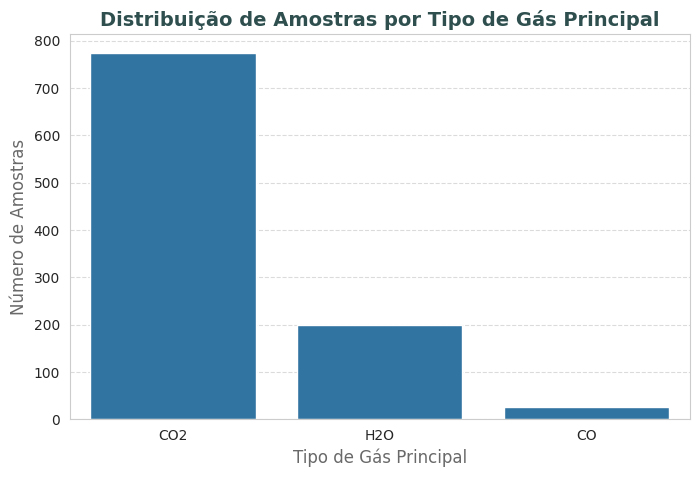

In [12]:
# Célula 8 - Distribuição dos tipos de gases principais

print("\nDistribuição dos tipos de gases principais:")
print(df['gas_principal'].value_counts())

# Visualização gráfica da distribuição dos gases
plt.figure(figsize=(8,5))
# Adicionado 'order' para ordenar as barras pela contagem (opcional, mas bom para clareza)
sns.countplot(data=df, x='gas_principal', order=df['gas_principal'].value_counts().index)
plt.title('Distribuição de Amostras por Tipo de Gás Principal', fontsize=14, color='darkslategray', weight='bold')
plt.xlabel('Tipo de Gás Principal', fontsize=12, color='dimgray')
plt.ylabel('Número de Amostras', fontsize=12, color='dimgray')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid apenas no eixo Y
plt.show()

## 9. Distribuição de concentrações

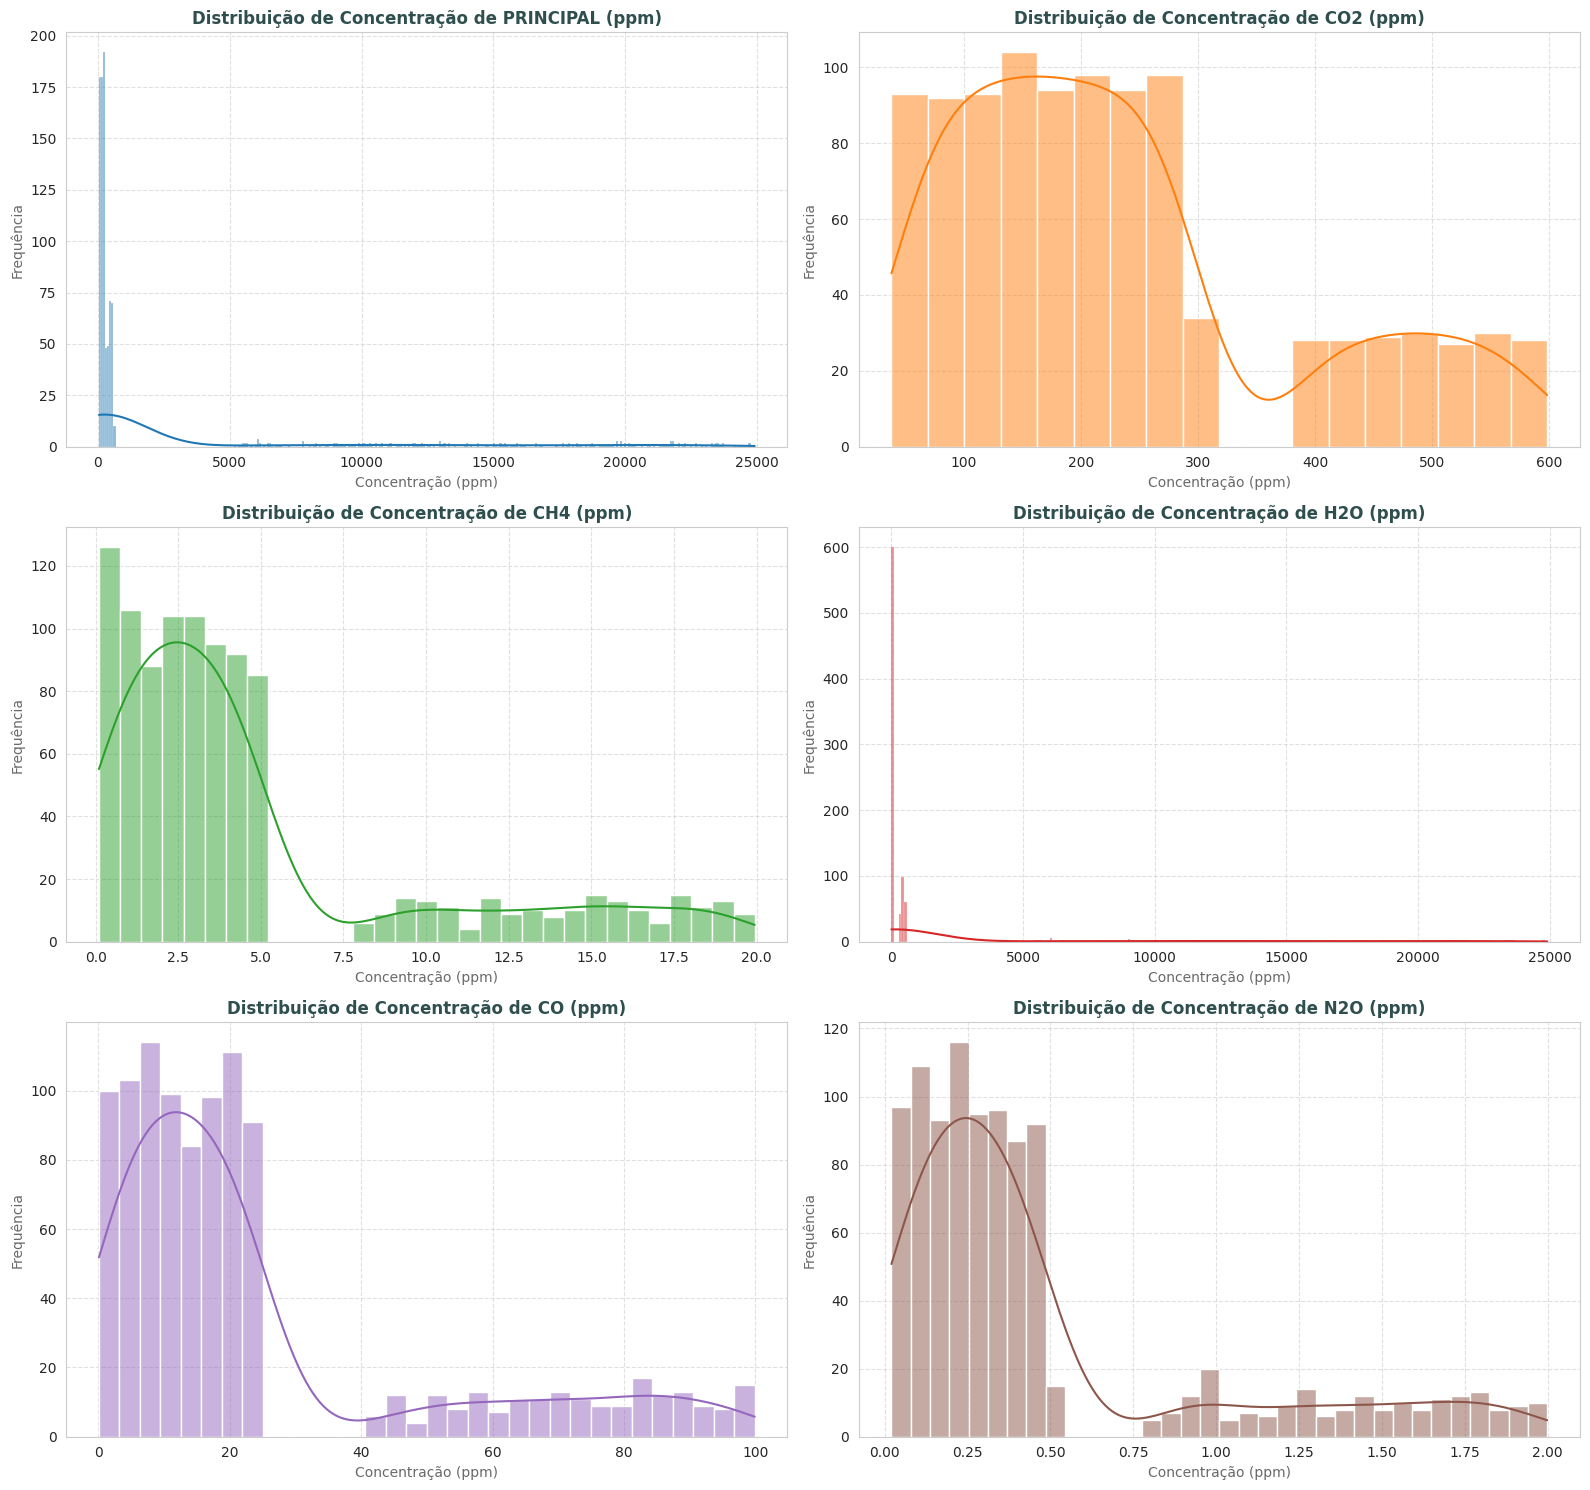


Estatísticas descritivas para as concentrações de cada gás:
       concentracao_principal_ppm  concentracao_CO2_ppm  concentracao_CH4_ppm  \
count                 1000.000000           1000.000000           1000.000000   
mean                  3153.392819            233.484883              4.817469   
std                   6366.514969            146.988110              5.038491   
min                     38.764738             38.109764              0.100598   
25%                    147.425495            121.400101              1.504653   
50%                    254.156487            201.495379              3.119018   
75%                    541.215502            281.290106              4.766008   
max                  24911.925071            598.255089             19.943456   

       concentracao_H2O_ppm  concentracao_CO_ppm  concentracao_N2O_ppm  
count           1000.000000          1000.000000           1000.000000  
mean            3057.686448            24.327855              0

In [13]:
# Célula 9 - Distribuição de concentrações (para cada gás individualmente)

# Obter a lista de colunas que contêm as concentrações dos gases.
colunas_concentracao = [col for col in df.columns if col.startswith('concentracao_') and col.endswith('_ppm')]

# Determinar o layout para o grid de gráficos
num_gases = len(colunas_concentracao)
num_cols = 2 # Por exemplo, 2 gráficos por linha
num_rows = (num_gases + num_cols - 1) // num_cols # Calcula o número de linhas necessárias

plt.figure(figsize=(num_cols * 8, num_rows * 5)) # Ajusta o tamanho total da figura

# Usar uma paleta de cores para os histogramas
palette = sns.color_palette("tab10", num_gases)

for i, col_conc in enumerate(colunas_concentracao):
    plt.subplot(num_rows, num_cols, i + 1) # Adiciona um subplot no grid
    
    gas_nome = col_conc.replace('concentracao_', '').replace('_ppm', '').upper()
    
    sns.histplot(data=df, x=col_conc, kde=True, bins='auto', color=palette[i]) # 'bins='auto'' e cor da paleta
    plt.title(f'Distribuição de Concentração de {gas_nome} (ppm)', fontsize=12, color='darkslategray', weight='bold')
    plt.xlabel('Concentração (ppm)', fontsize=10, color='dimgray')
    plt.ylabel('Frequência', fontsize=10, color='dimgray')
    plt.grid(True, linestyle='--', alpha=0.6) # Adiciona grid
    
plt.tight_layout() # Ajusta o layout para evitar sobreposição de títulos e labels
plt.show()

# Opcional: Imprimir as estatísticas descritivas para todas as colunas de concentração
print("\nEstatísticas descritivas para as concentrações de cada gás:")
print(df[colunas_concentracao].describe())

## 10. Visualização dos Espectros de absorção
- Visualizar as formas do espectro fotoacústico para diferenes gases
- Entender como os picos de absorção se manifestam e como eles podem se sobrepor em misturas.
- Ideia visual da variabilidade dos espectros

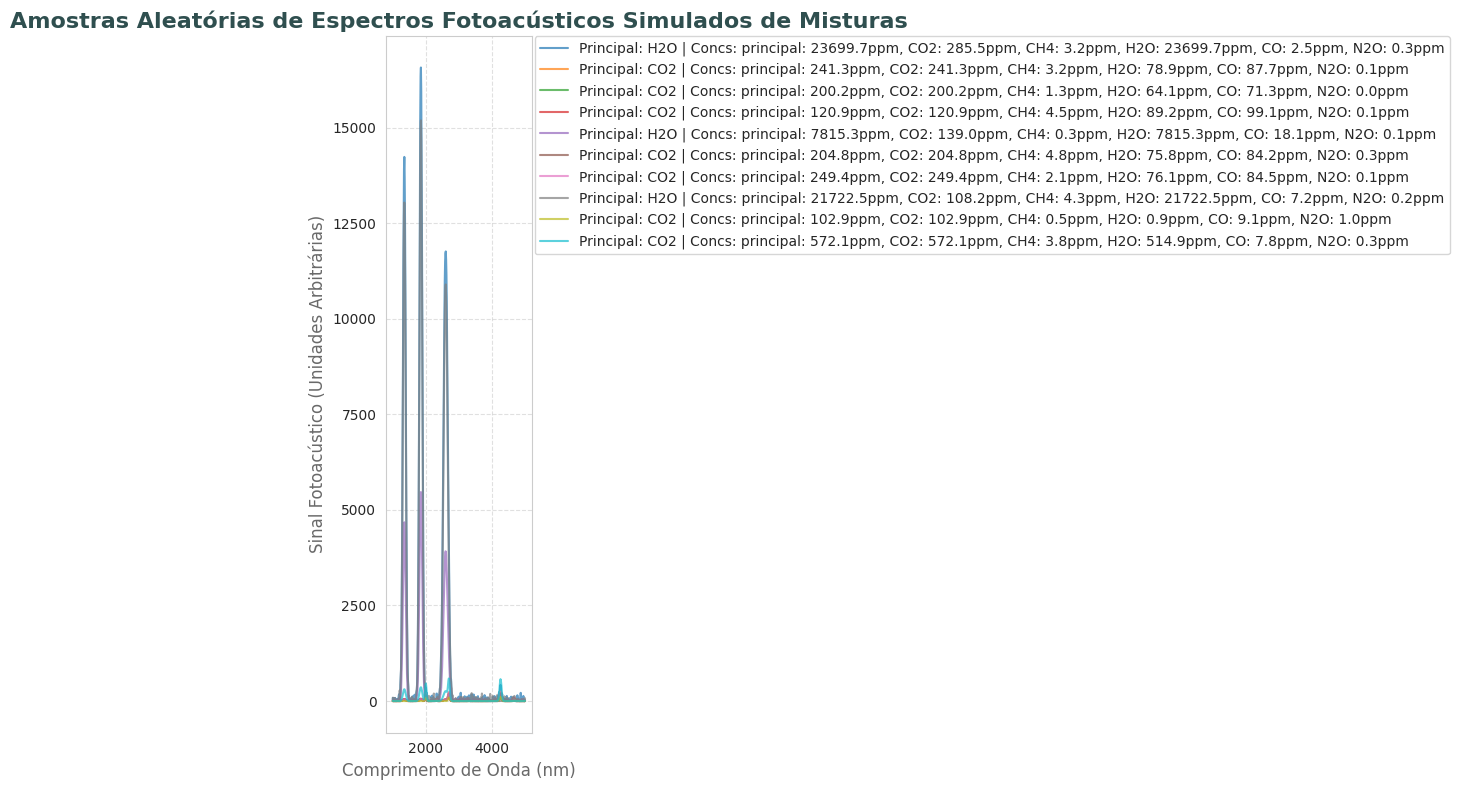

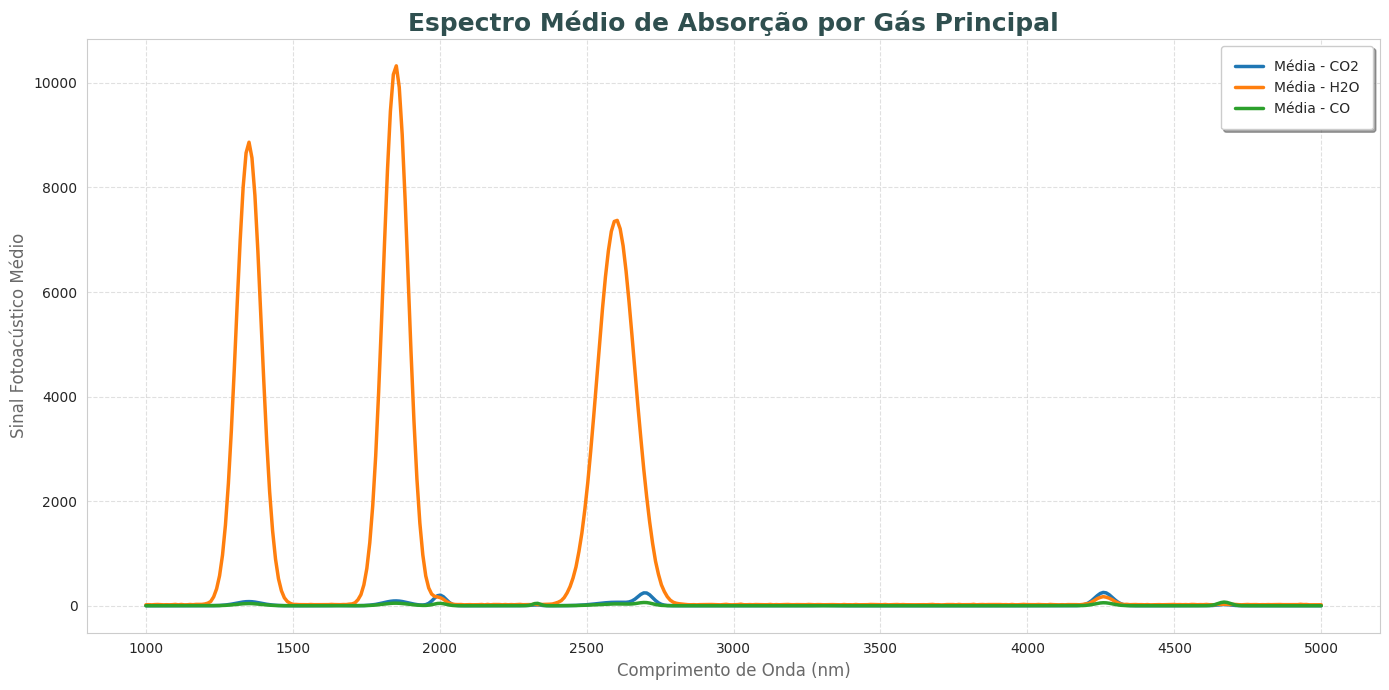

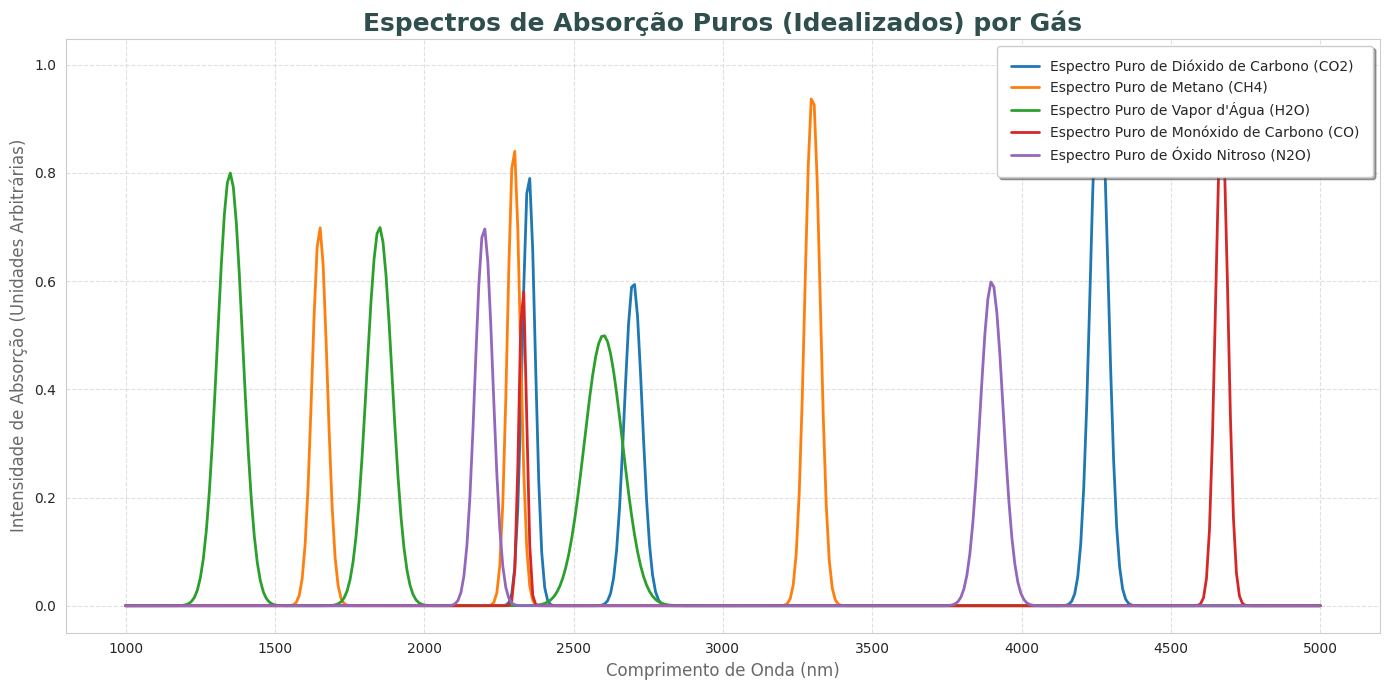

In [14]:
# Célula 10 - Visualização de Espectros de Absorção

# --- 10.1. Plotar alguns espectros de amostras aleatórias para ver a variabilidade geral ---

plt.figure(figsize=(14, 8)) # Tamanho ligeiramente maior para melhor legibilidade
num_amostras_para_plotar = 10 
colunas_espectro = [col for col in df.columns if col.startswith('lambda_')]

amostras_aleatorias = df.sample(n=num_amostras_para_plotar, random_state=42)

for idx, row in amostras_aleatorias.iterrows():
    espectro_data = row[colunas_espectro].values
    
    concentracoes_str = ", ".join([
        f"{g.replace('concentracao_', '').replace('_ppm', '')}: {row[g]:.1f}ppm" 
        for g in df.columns if g.startswith('concentracao_') and g.endswith('_ppm')
    ])
    
    plt.plot(COMPRIMENTOS_ONDA_VARREDURA, espectro_data, 
             label=f"Principal: {row['gas_principal']} | Concs: {concentracoes_str}", alpha=0.7)

plt.title('Amostras Aleatórias de Espectros Fotoacústicos Simulados de Misturas', 
          fontsize=16, color='darkslategray', weight='bold')
plt.xlabel('Comprimento de Onda (nm)', fontsize=12, color='dimgray')
plt.ylabel('Sinal Fotoacústico (Unidades Arbitrárias)', fontsize=12, color='dimgray')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Ajuste da posição da legenda
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta o layout para acomodar a legenda fora
plt.show()


# --- 10.2. Plotar o espectro médio para cada 'Gás Principal' ---

gases_unicos = df['gas_principal'].unique()

plt.figure(figsize=(14, 7))

# Usar uma paleta de cores distinta para cada gás
palette = sns.color_palette("tab10", len(gases_unicos))
colors = {gas: palette[i] for i, gas in enumerate(gases_unicos)}

for gas in gases_unicos:
    media_espectro = df[df['gas_principal'] == gas][colunas_espectro].mean(axis=0).values
    
    plt.plot(COMPRIMENTOS_ONDA_VARREDURA, media_espectro, 
             label=f'Média - {gas}', 
             color=colors[gas], 
             linewidth=2.5)

plt.title('Espectro Médio de Absorção por Gás Principal', 
          fontsize=18, color='darkslategray', weight='bold')
plt.xlabel('Comprimento de Onda (nm)', fontsize=12, color='dimgray')
plt.ylabel('Sinal Fotoacústico Médio', fontsize=12, color='dimgray')
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 10.3. Opcional: Plotar espectros "puros" de cada gás (idealizado) ---
# Este bloco agora funcionará, pois GASES_INFO_PROJETO e calcular_absorcao_para_gas estão definidos.

plt.figure(figsize=(14, 7))
for gas_formula, info in GASES_INFO_PROJETO.items():
    espectro_puro = calcular_absorcao_para_gas(info, COMPRIMENTOS_ONDA_VARREDURA)
    plt.plot(COMPRIMENTOS_ONDA_VARREDURA, espectro_puro, label=f'Espectro Puro de {info["nome"]} ({gas_formula})', linewidth=2)

plt.title('Espectros de Absorção Puros (Idealizados) por Gás', fontsize=18, color='darkslategray', weight='bold')
plt.xlabel('Comprimento de Onda (nm)', fontsize=12, color='dimgray')
plt.ylabel('Intensidade de Absorção (Unidades Arbitrárias)', fontsize=12, color='dimgray')
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 11. Análise de correlação

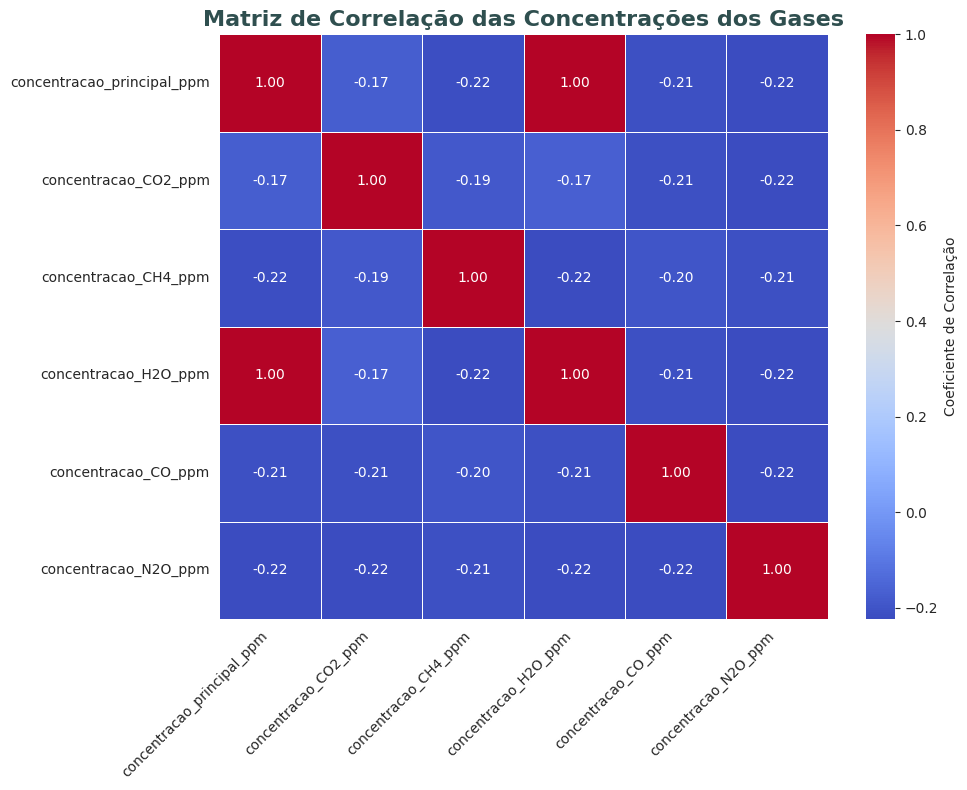


Estatísticas descritivas da matriz de correlação de concentrações:
                            concentracao_principal_ppm  concentracao_CO2_ppm  \
concentracao_principal_ppm                    1.000000             -0.171514   
concentracao_CO2_ppm                         -0.171514              1.000000   
concentracao_CH4_ppm                         -0.216510             -0.189147   
concentracao_H2O_ppm                          0.999936             -0.170561   
concentracao_CO_ppm                          -0.210774             -0.210728   
concentracao_N2O_ppm                         -0.220497             -0.219838   

                            concentracao_CH4_ppm  concentracao_H2O_ppm  \
concentracao_principal_ppm             -0.216510              0.999936   
concentracao_CO2_ppm                   -0.189147             -0.170561   
concentracao_CH4_ppm                    1.000000             -0.219346   
concentracao_H2O_ppm                   -0.219346              1.000000   
c

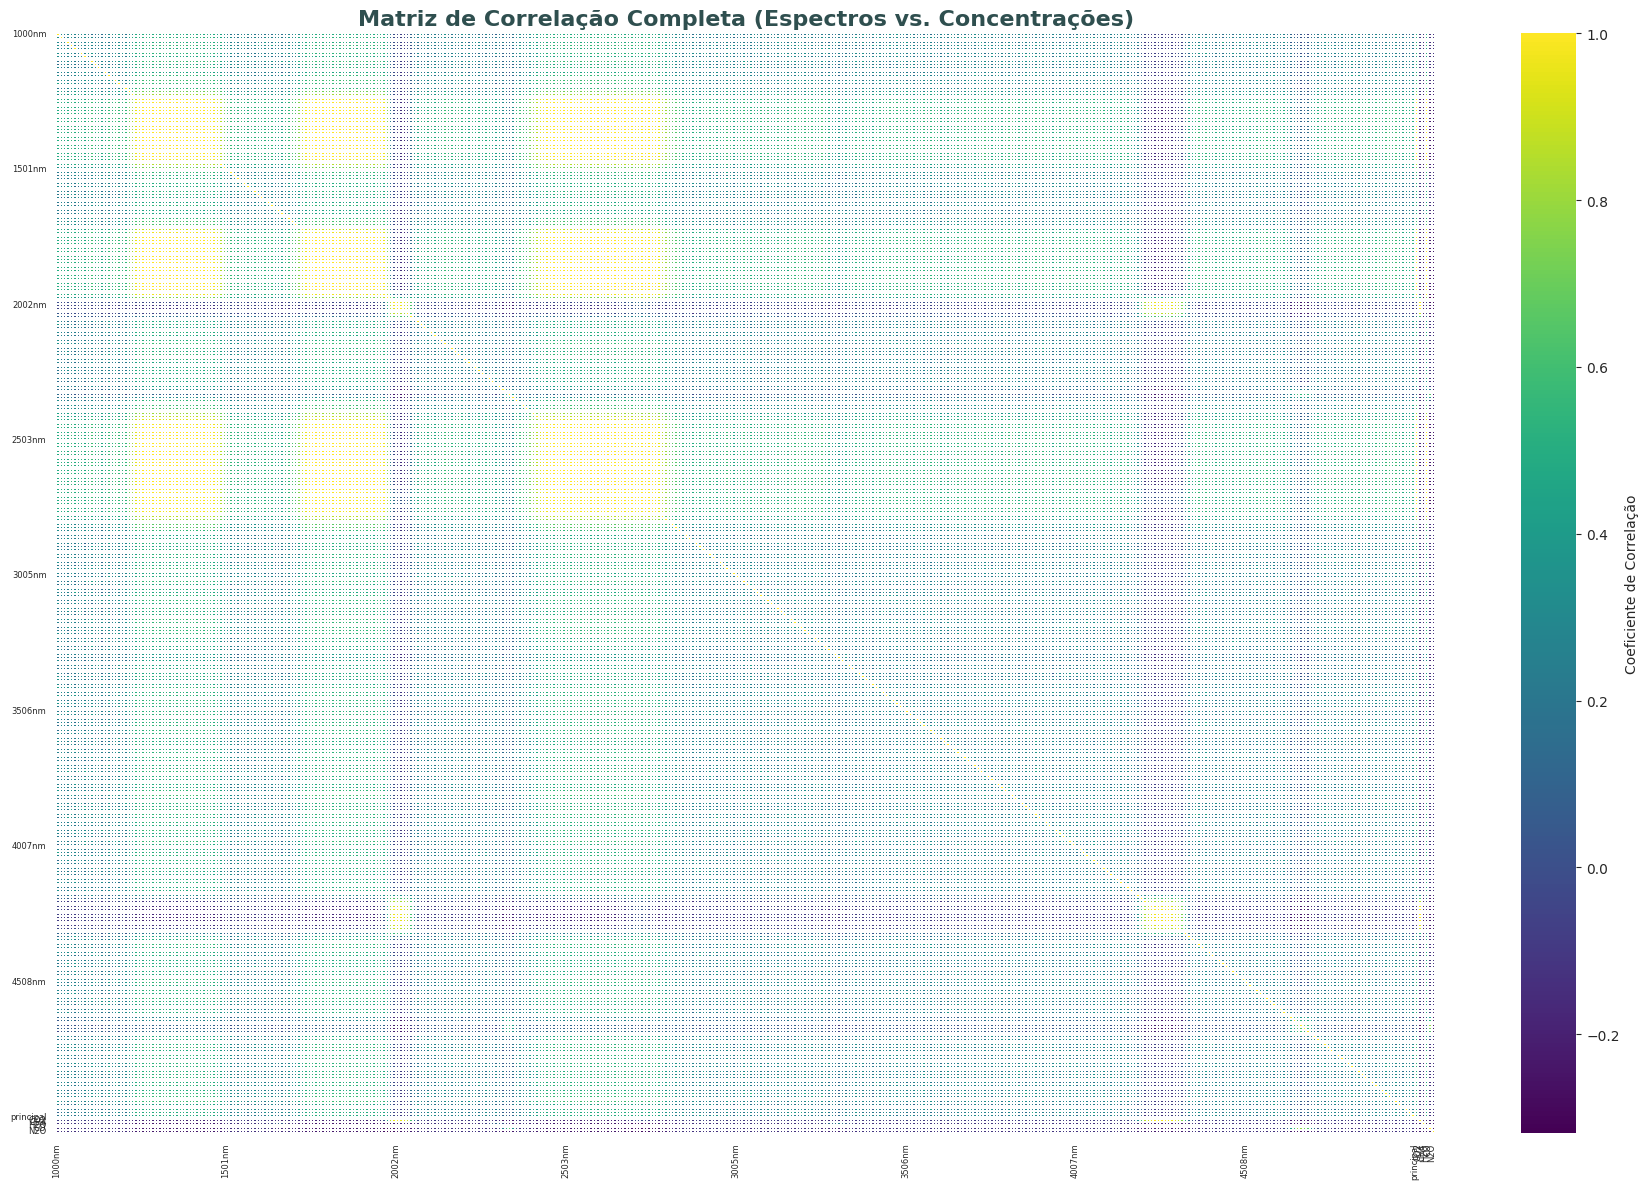


Visão detalhada da correlação entre Sinais Espectrais e Concentrações de Gás:


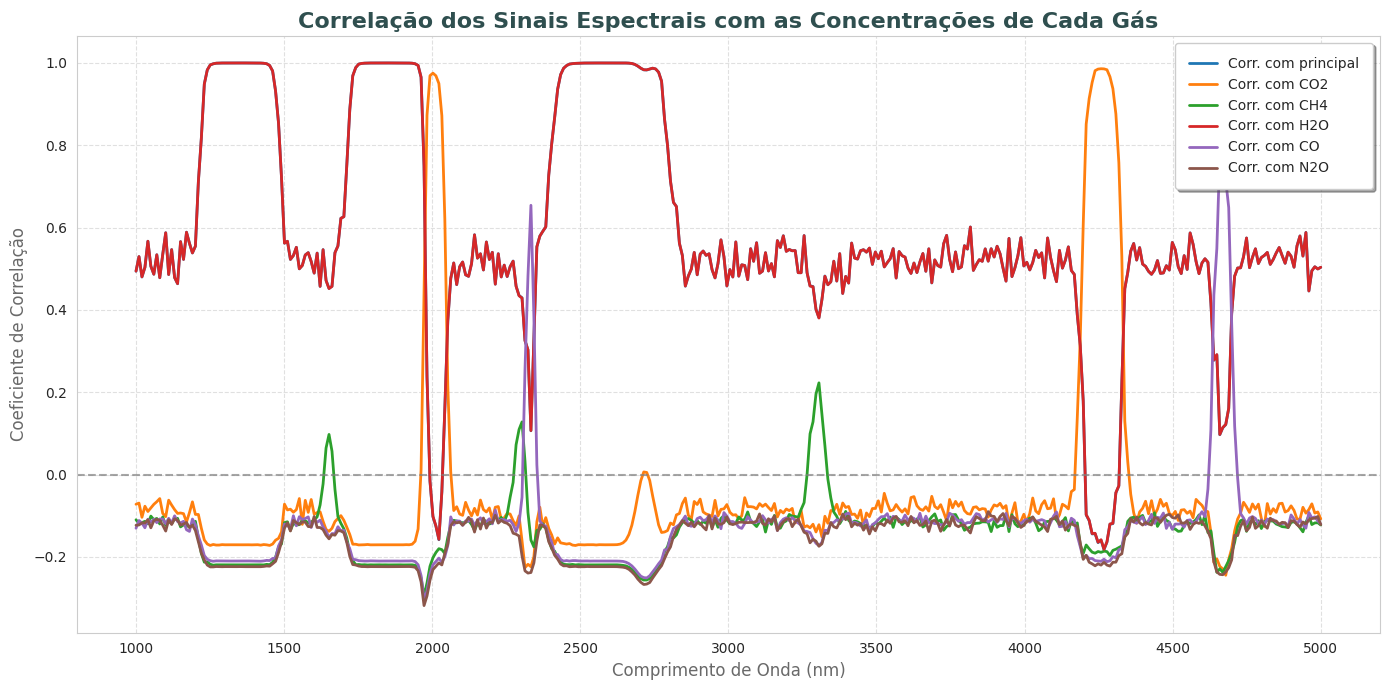

In [15]:
# Célula 11 - Análise de Correlação

# --- 11.1. Matriz de Correlação das Concentrações dos Gases ---

# Selecionar apenas as colunas de concentração
colunas_concentracao = [col for col in df.columns if col.startswith('concentracao_') and col.endswith('_ppm')]
df_concentracoes = df[colunas_concentracao]

# Calcular a matriz de correlação
matriz_correlacao_concentracao = df_concentracoes.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_concentracao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'}) # Adicionado label para colorbar
plt.title('Matriz de Correlação das Concentrações dos Gases', 
          fontsize=16, color='darkslategray', weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10) # Aumenta um pouco o fontsize dos ticks
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da matriz de correlação de concentrações:")
print(matriz_correlacao_concentracao)


# --- 11.2. Correlação entre Concentrações de Gases e Sinais Espectrais ---

colunas_espectro = [col for col in df.columns if col.startswith('lambda_')]
colunas_concentracao = [col for col in df.columns if col.startswith('concentracao_') and col.endswith('_ppm')]

df_features_targets = df[colunas_espectro + colunas_concentracao]

matriz_correlacao_completa = df_features_targets.corr()

plt.figure(figsize=(18, 12)) # Tamanho maior para matrizes grandes
sns.heatmap(matriz_correlacao_completa, annot=False, cmap='viridis', linewidths=.01, cbar_kws={'label': 'Coeficiente de Correlação'}) # linewidths menor para melhor visualização
plt.title('Matriz de Correlação Completa (Espectros vs. Concentrações)', 
          fontsize=16, color='darkslategray', weight='bold')

# --- INÍCIO DA CORREÇÃO PARA OS RÓTULOS DOS TICKS DO HEATMAP ---
total_col_names = colunas_espectro + colunas_concentracao
total_num_cols = len(total_col_names)

# As posições dos ticks devem ser para cada coluna
tick_locations = np.arange(total_num_cols)

# Gerar rótulos para o eixo X
xticks_labels = []
for i, col_name in enumerate(colunas_espectro):
    # Exibir rótulo apenas para comprimentos de onda a cada 50 pontos
    if i % 50 == 0:
        # Extrai o número do comprimento de onda do nome da coluna (ex: 'lambda_1000nm' -> 1000)
        wavelength = int(col_name.replace('lambda_', '').replace('nm', ''))
        xticks_labels.append(f'{wavelength}nm')
    else:
        xticks_labels.append('')
# Adicionar os rótulos das concentrações ao final
xticks_labels.extend([col.replace('concentracao_', '').replace('_ppm', '') for col in colunas_concentracao])


# Gerar rótulos para o eixo Y (pode ser o mesmo que o X para um heatmap simétrico)
yticks_labels = []
for i, col_name in enumerate(colunas_espectro):
    if i % 50 == 0:
        wavelength = int(col_name.replace('lambda_', '').replace('nm', ''))
        yticks_labels.append(f'{wavelength}nm')
    else:
        yticks_labels.append('')
yticks_labels.extend([col.replace('concentracao_', '').replace('_ppm', '') for col in colunas_concentracao])

# Aplicar os ticks e rótulos
plt.xticks(tick_locations, xticks_labels, rotation=90, fontsize=6)
plt.yticks(tick_locations, yticks_labels, rotation=0, fontsize=6)
# --- FIM DA CORREÇÃO ---

plt.tight_layout()
plt.show()

print("\nVisão detalhada da correlação entre Sinais Espectrais e Concentrações de Gás:")

correlacao_espectro_concentracao = matriz_correlacao_completa.loc[colunas_espectro, colunas_concentracao]

plt.figure(figsize=(14, 7))
# Usar a mesma paleta de cores para consistência
palette = sns.color_palette("tab10", len(colunas_concentracao))
colors = {gas.replace('concentracao_', '').replace('_ppm', ''): palette[i] for i, gas in enumerate(colunas_concentracao)}

for gas_col in colunas_concentracao:
    gas_nome_simples = gas_col.replace("concentracao_", "").replace("_ppm", "")
    plt.plot(COMPRIMENTOS_ONDA_VARREDURA, correlacao_espectro_concentracao[gas_col], 
             label=f'Corr. com {gas_nome_simples}', 
             linewidth=2,
             color=colors[gas_nome_simples]) # Aplica a cor consistente

plt.title('Correlação dos Sinais Espectrais com as Concentrações de Cada Gás',
          fontsize=16, color='darkslategray', weight='bold')
plt.xlabel('Comprimento de Onda (nm)', fontsize=12, color='dimgray')
plt.ylabel('Coeficiente de Correlação', fontsize=12, color='dimgray')
plt.legend(loc='best', fontsize=10, frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', alpha=0.7) # Linha em y=0 para referência
plt.tight_layout()
plt.show()

## 12 - Análise de anomalias (Outlier)
- Para concentrações e sinais espectrais

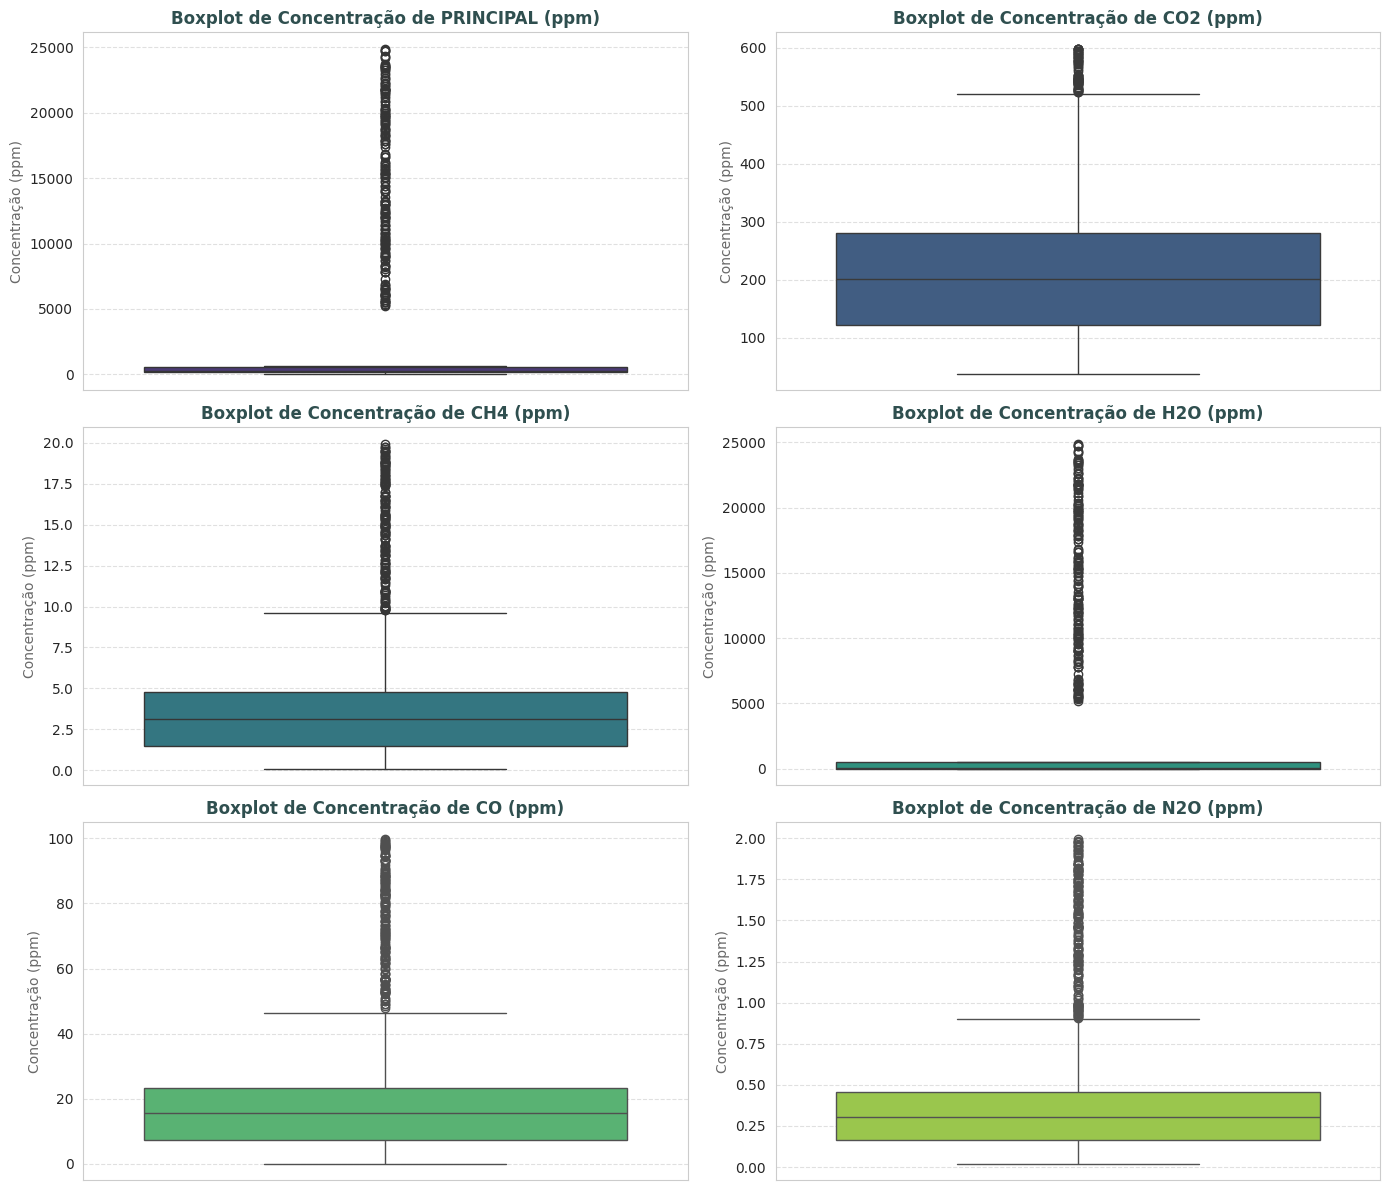


Boxplots das concentrações de gases gerados.


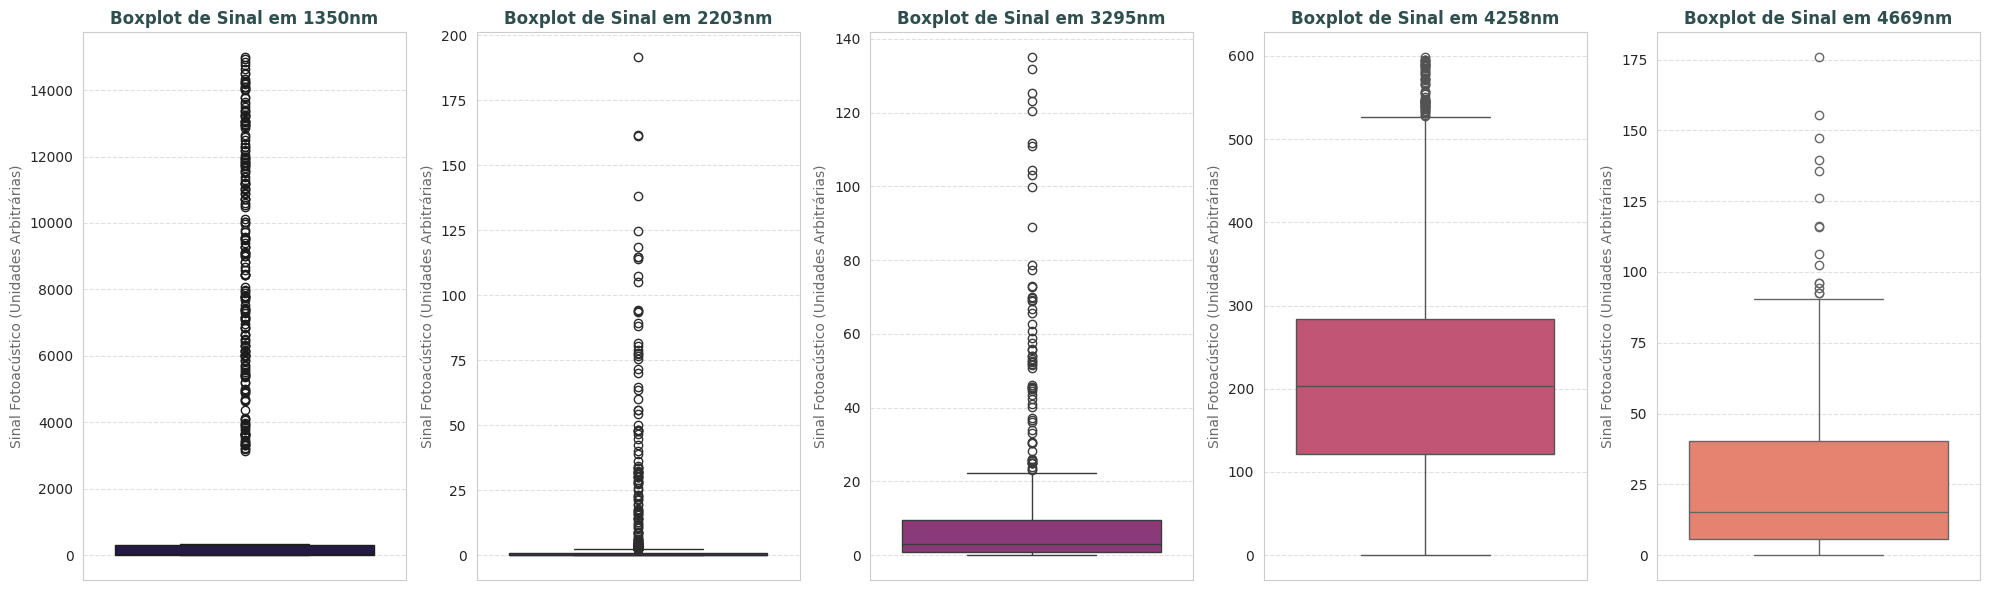


Boxplots dos sinais espectrais em comprimentos de onda chave gerados.

Análise de outliers concluída.


In [16]:
# --- 12.1. Boxplots para as Concentrações ---
colunas_concentracao = [col for col in df.columns if col.startswith('concentracao_') and col.endswith('_ppm')]

num_gases = len(colunas_concentracao)
num_cols = 2 # Exemplo: 2 gráficos por linha
num_rows = (num_gases + num_cols - 1) // num_cols # Calcula o número de linhas necessárias

plt.figure(figsize=(num_cols * 7, num_rows * 4)) # Ajusta o tamanho total da figura

for i, col_conc in enumerate(colunas_concentracao):
    plt.subplot(num_rows, num_cols, i + 1) # Adiciona um subplot no grid
    
    gas_nome = col_conc.replace('concentracao_', '').replace('_ppm', '').upper()
    
    # Usando uma paleta de cores para os boxplots
    sns.boxplot(y=df[col_conc], color=sns.color_palette("viridis")[i % len(sns.color_palette("viridis"))])
    
    plt.title(f'Boxplot de Concentração de {gas_nome} (ppm)', fontsize=12, color='darkslategray', weight='bold')
    plt.ylabel('Concentração (ppm)', fontsize=10, color='dimgray')
    plt.grid(axis='y', linestyle='--', alpha=0.6) # Grid apenas no eixo Y

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

print("\nBoxplots das concentrações de gases gerados.")

# --- 12.2. Boxplots para Sinais Espectrais em Comprimentos de Onda Chave ---
# Selecionar alguns comprimentos de onda representativos (ex: picos de absorção conhecidos de GASES_INFO_PROJETO)
# Use os centros dos picos de absorção dos gases principais para selecionar os lambdas chave.
# Vamos pegar um pico representativo de cada gás para o boxplot.

# Lista de lambdas chaves baseada nos centros dos picos de absorção
lambdas_chave = []
for gas_info in GASES_INFO_PROJETO.values():
    if gas_info['picos_absorcao']: # Verifica se há picos de absorção para o gás
        # Pega o primeiro pico de absorção ou o mais intenso, ou um representativo
        # Para simplificar, pegaremos o centro do pico de maior intensidade para cada gás
        pico_mais_intenso = max(gas_info['picos_absorcao'], key=lambda p: p['intensidade_max'])
        
        # Encontrar o lambda mais próximo no seu COMPRIMENTOS_ONDA_VARREDURA
        # Primeiro, obtenha o índice do comprimento de onda mais próximo
        idx_proximo = np.abs(COMPRIMENTOS_ONDA_VARREDURA - pico_mais_intenso['centro_nm']).argmin()
        # Use o comprimento de onda real do seu array
        lambda_real = COMPRIMENTOS_ONDA_VARREDURA[idx_proximo]
        
        lambdas_chave.append(f'lambda_{int(lambda_real)}nm')

# Remove duplicatas, caso diferentes gases tenham picos próximos e resultem no mesmo lambda
lambdas_chave = sorted(list(set(lambdas_chave)))

# Verificar se os lambdas_chave existem no dataframe para evitar erros
lambdas_existentes = [l for l in lambdas_chave if l in df.columns]

if lambdas_existentes:
    plt.figure(figsize=(len(lambdas_existentes) * 4, 6)) # Ajusta o tamanho da figura
    for i, col_lambda in enumerate(lambdas_existentes):
        plt.subplot(1, len(lambdas_existentes), i + 1)
        # Usando uma paleta de cores diferente para os boxplots de lambda
        sns.boxplot(y=df[col_lambda], color=sns.color_palette("magma")[i % len(sns.color_palette("magma"))])
        
        plt.title(f'Boxplot de Sinal em {col_lambda.replace("lambda_", "")}', fontsize=12, color='darkslategray', weight='bold')
        plt.xlabel('') # Remove o label X padrão para boxplots verticais
        plt.ylabel('Sinal Fotoacústico (Unidades Arbitrárias)', fontsize=10, color='dimgray')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("\nBoxplots dos sinais espectrais em comprimentos de onda chave gerados.")
else:
    print("\nNenhum dos comprimentos de onda chave selecionados foi encontrado no dataset. Verifique a consistência entre GASES_INFO_PROJETO e as colunas do DataFrame.")

print("\nAnálise de outliers concluída.")

--- Análise de Relações Bivariadas (Espectro vs. Concentração) ---


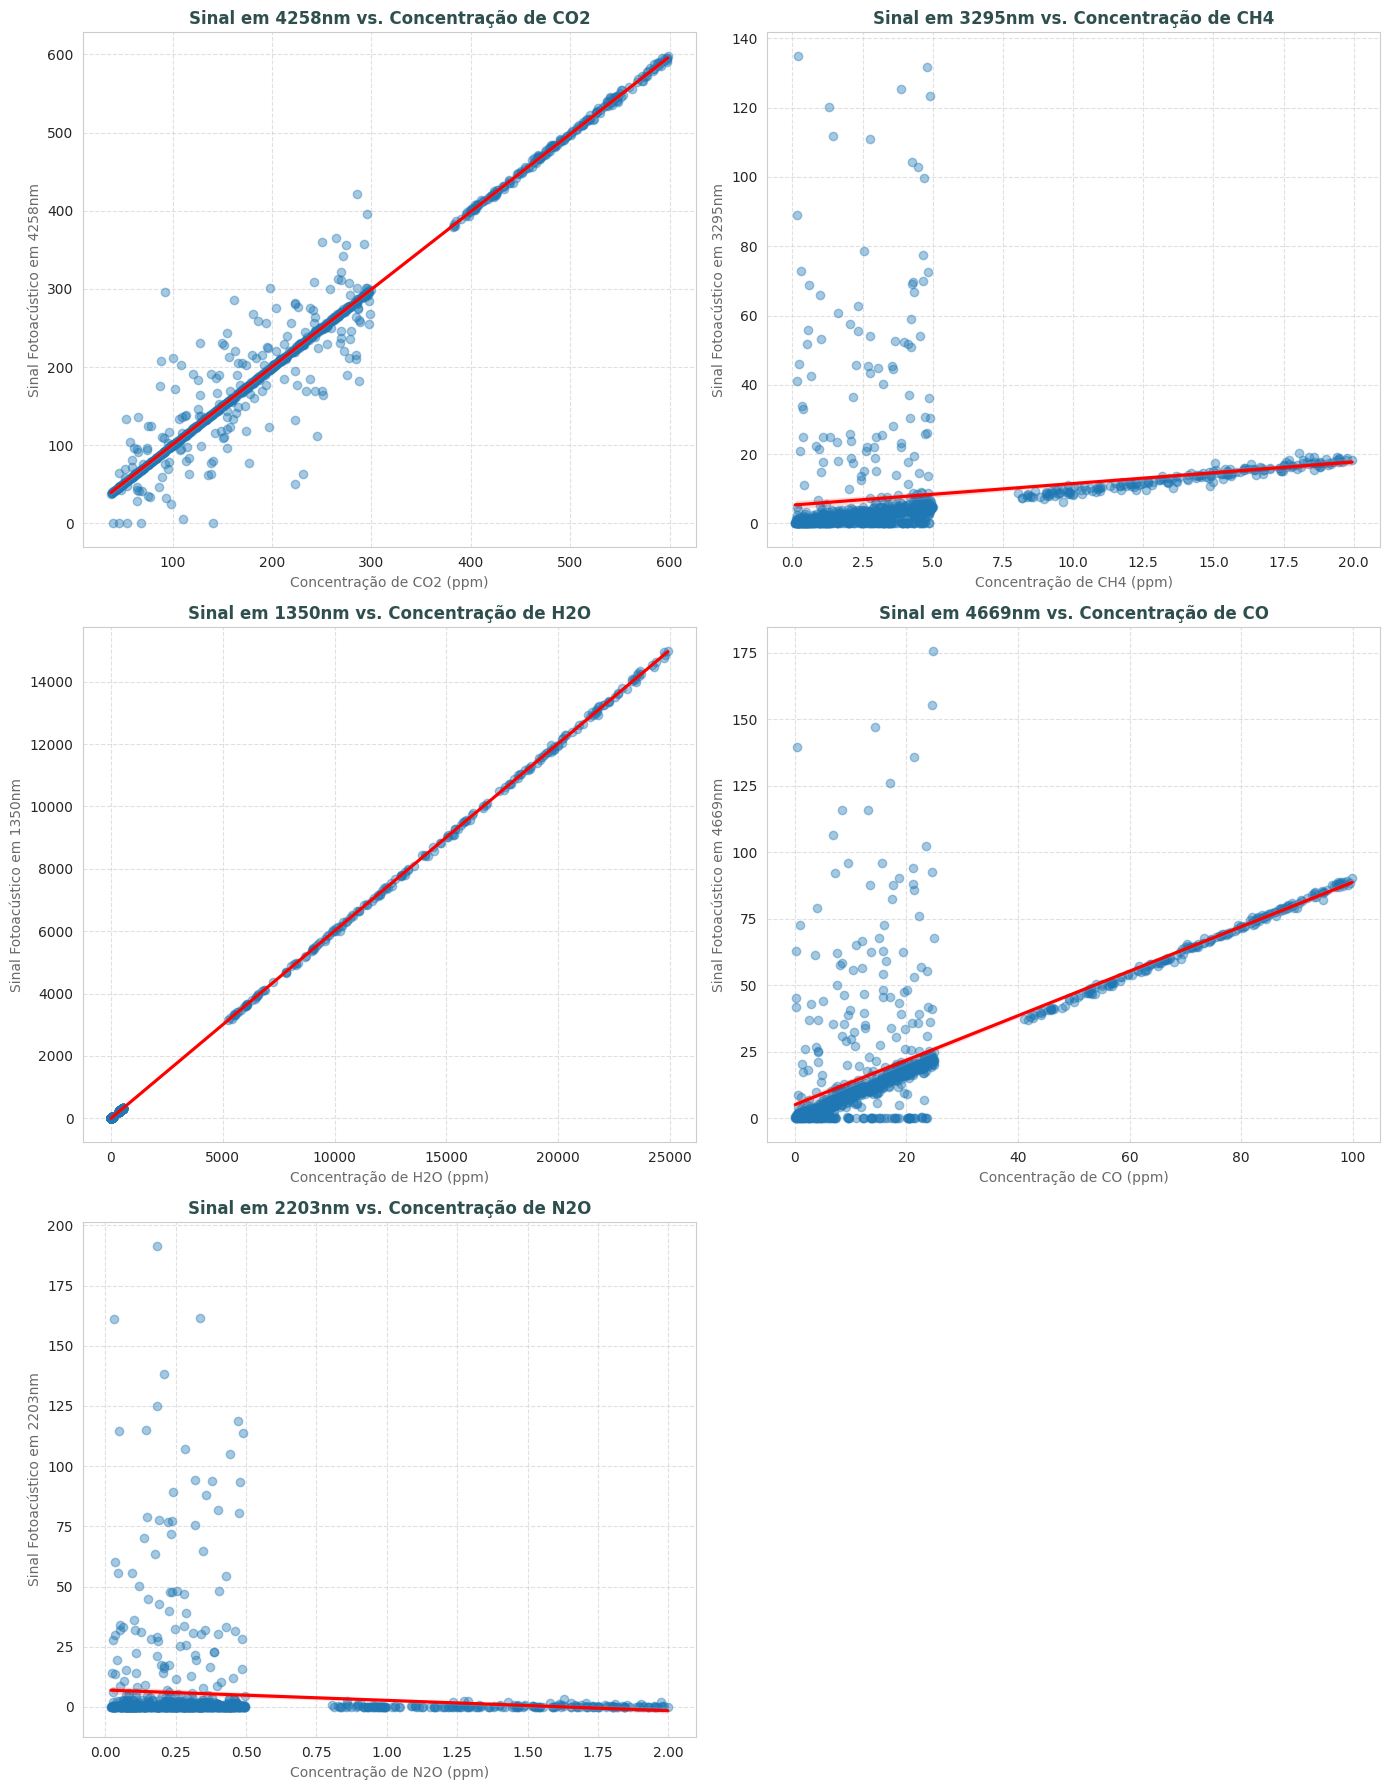


Gráficos de dispersão com regressão gerados para lambdas chave vs. concentrações.

Análise de relações bivariadas concluída.


In [17]:
## 13. Distribuição conjunta e relações bivariadas (Espectro vs. Concentração)

print("--- Análise de Relações Bivariadas (Espectro vs. Concentração) ---")

# Selecionar alguns comprimentos de onda chave e seus gases correspondentes
# Usar os lambdas chave que já foram identificados na Célula 12.2
# Adicionar explicitamente qual gás estamos correlacionando para clareza.

# Re-criação da lista de lambdas_chave e seus gases, para garantir que temos os pares corretos.
# Plotar a concentração de um gás X versus o sinal no lambda onde ele tem seu pico mais forte.

# Lista de pares (coluna_concentracao, coluna_lambda) para plotar
pares_concentracao_lambda = []

for gas_formula, info in GASES_INFO_PROJETO.items():
    if info['picos_absorcao']:
        # Encontra o pico de maior intensidade para o gás atual
        pico_mais_intenso = max(info['picos_absorcao'], key=lambda p: p['intensidade_max'])
        
        # Encontra o comprimento de onda real no seu array de varredura mais próximo do centro do pico
        idx_proximo = np.abs(COMPRIMENTOS_ONDA_VARREDURA - pico_mais_intenso['centro_nm']).argmin()
        lambda_real = COMPRIMENTOS_ONDA_VARREDURA[idx_proximo]
        
        col_conc = f'concentracao_{gas_formula}_ppm'
        col_lambda = f'lambda_{int(lambda_real)}nm'
        
        # Adiciona o par se ambas as colunas existirem no DataFrame
        if col_conc in df.columns and col_lambda in df.columns:
            pares_concentracao_lambda.append((col_conc, col_lambda, gas_formula))
        else:
            print(f"Aviso: Colunas {col_conc} ou {col_lambda} não encontradas para {gas_formula}.")

num_plots = len(pares_concentracao_lambda)
if num_plots > 0:
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    plt.figure(figsize=(num_cols * 7, num_rows * 6)) # Ajusta o tamanho da figura

    for i, (col_conc, col_lambda, gas_formula) in enumerate(pares_concentracao_lambda):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Usar regplot para mostrar dispersão e linha de regressão linear
        sns.regplot(data=df, x=col_conc, y=col_lambda, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
        
        plt.title(f'Sinal em {col_lambda.replace("lambda_", "")} vs. Concentração de {gas_formula}', 
                  fontsize=12, color='darkslategray', weight='bold')
        plt.xlabel(f'Concentração de {gas_formula} (ppm)', fontsize=10, color='dimgray')
        plt.ylabel(f'Sinal Fotoacústico em {col_lambda.replace("lambda_", "")}', fontsize=10, color='dimgray')
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()
    print("\nGráficos de dispersão com regressão gerados para lambdas chave vs. concentrações.")
else:
    print("\nNenhum par de concentração-lambda chave foi encontrado para plotar.")

print("\nAnálise de relações bivariadas concluída.")

-----

## 14 - Análise de componentes principais (PCA) para sinais espectrais
- Aplicação do PCA aos seus dados de espectro pra ver se é possível separar visualmente os diferentes tipos de " gás principal " em um espaço de menor dimensão

--- Análise de Componentes Principais (PCA) ---
Variância explicada pelos 2 primeiros componentes principais: 0.46
PC1 explica 0.42 da variância.
PC2 explica 0.05 da variância.


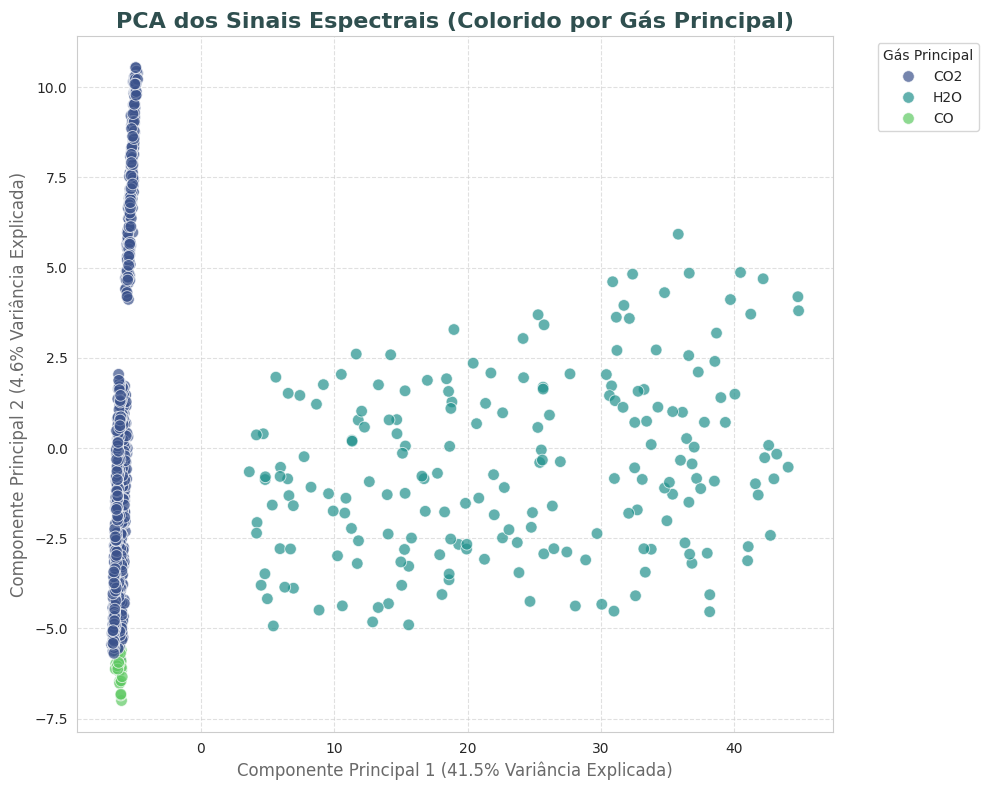


Gráfico PCA gerado.

Análise de Componentes Principais concluída.


In [18]:
print("--- Análise de Componentes Principais (PCA) ---")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Preparar os dados para PCA: Apenas as colunas de espectro
colunas_espectro = [col for col in df.columns if col.startswith('lambda_')]
X_espectro = df[colunas_espectro]

# 2. Escalonar os dados (padronização): Essencial para PCA
# PCA é sensível à escala das features. StandardScaler garante média 0 e variância 1.
scaler = StandardScaler()
X_espectro_scaled = scaler.fit_transform(X_espectro)

# 3. Aplicar PCA
# Vamos calcular os dois primeiros componentes principais para visualização 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_espectro_scaled)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adicionar a coluna 'gas_principal' para colorir o gráfico
df_pca['gas_principal'] = df['gas_principal']

print(f"Variância explicada pelos 2 primeiros componentes principais: {pca.explained_variance_ratio_.sum():.2f}")
print(f"PC1 explica {pca.explained_variance_ratio_[0]:.2f} da variância.")
print(f"PC2 explica {pca.explained_variance_ratio_[1]:.2f} da variância.")

# 4. Visualizar os resultados do PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='gas_principal', 
    data=df_pca, 
    palette='viridis', # Ou 'tab10', 'Set1', etc. Escolha uma paleta de cores para categorias
    s=70, # Tamanho dos pontos
    alpha=0.7 # Transparência
)

plt.title('PCA dos Sinais Espectrais (Colorido por Gás Principal)', 
          fontsize=16, color='darkslategray', weight='bold')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variância Explicada)', 
           fontsize=12, color='dimgray')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variância Explicada)', 
           fontsize=12, color='dimgray')
plt.legend(title='Gás Principal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nGráfico PCA gerado.")
print("\nAnálise de Componentes Principais concluída.")

## 15. Verificação das dimensões dos dados para modelagem

In [19]:
print("--- Verificação das Dimensões dos Dados ---")

# Identificar as colunas de features (X) e o target (y)
colunas_features = [col for col in df.columns if col.startswith('lambda_')]
coluna_target_classificacao = 'gas_principal'
colunas_targets_regressao = [col for col in df.columns if col.startswith('concentracao_') and col.endswith('_ppm')]


# X (Features): Os sinais espectrais
X = df[colunas_features]

# y_class (Target para Classificação): O gás principal
y_class = df[coluna_target_classificacao]

# y_reg (Targets para Regressão): As concentrações de cada gás (se for fazer regressão multivariada ou para cada gás)
y_reg = df[colunas_targets_regressao]

print(f"Dimensão das Features (X - Sinais Espectrais): {X.shape}")
print(f"Número de amostras: {X.shape[0]}")
print(f"Número de comprimentos de onda (features espectrais): {X.shape[1]}")

print(f"\nDimensão do Target para Classificação (y_class - Gás Principal): {y_class.shape}")
print(f"Classes únicas de Gás Principal: {y_class.unique()}")

print(f"\nDimensão dos Targets para Regressão (y_reg - Concentrações de Gases): {y_reg.shape}")
print(f"Número de targets de regressão (gases): {y_reg.shape[1]}")

print("\nVerificação de dimensões concluída. Os dados estão prontos para a etapa de pré-processamento e modelagem.")

--- Verificação das Dimensões dos Dados ---
Dimensão das Features (X - Sinais Espectrais): (1000, 400)
Número de amostras: 1000
Número de comprimentos de onda (features espectrais): 400

Dimensão do Target para Classificação (y_class - Gás Principal): (1000,)
Classes únicas de Gás Principal: ['CO2' 'H2O' 'CO']

Dimensão dos Targets para Regressão (y_reg - Concentrações de Gases): (1000, 6)
Número de targets de regressão (gases): 6

Verificação de dimensões concluída. Os dados estão prontos para a etapa de pré-processamento e modelagem.


-----

## 16. Pré-processamento e Divisão de dados
- Separar features (X) e Targets (Y). (Formalizando o que ja foi feito na célula 15).
- Codificar o Target Categórico (gas_principal).
- Dividir os dados em conjutos de Treinamento e Teste: Avaliar o desempenho do modelo em dados não vistos.

In [20]:
print("--- Pré-processamento e Divisão de Dados ---")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Separar Features (X) e Targets (y)
colunas_features = [col for col in df.columns if col.startswith('lambda_')]
coluna_target_classificacao = 'gas_principal'
colunas_targets_regressao = [col for col in df.columns if col.startswith('concentracao_') and col.endswith('_ppm')]

X = df[colunas_features]
y_class = df[coluna_target_classificacao]
y_reg = df[colunas_targets_regressao] # Manter y_reg caso queira fazer regressão depois

print(f"X (Features) shape: {X.shape}")
print(f"y_class (Target Classificação) shape: {y_class.shape}")
print(f"y_reg (Targets Regressão) shape: {y_reg.shape}")


# 2. Codificar o Target Categórico (y_class) para valores numéricos
# Usaremos LabelEncoder para transformar os nomes dos gases em números (0, 1, 2...).
# Isso é necessário para a maioria dos algoritmos de classificação.
encoder = LabelEncoder()
y_class_encoded = encoder.fit_transform(y_class)

# Mapeamento para referência futura
mapeamento_classes = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"\nMapeamento de classes de Gás Principal (original -> numérico): {mapeamento_classes}")
print(f"Primeiros 5 valores de y_class_encoded: {y_class_encoded[:5]}")


# 3. Dividir os Dados em Conjuntos de Treinamento e Teste
# Para classificação, é bom usar 'stratify' para garantir que as proporções das classes
# sejam mantidas nos conjuntos de treino e teste, especialmente com datasets balanceados.
# Definimos um 'random_state' para reprodutibilidade.

X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class_encoded, test_size=0.01, random_state=42, stratify=y_class_encoded
)

# Opcional: Dividir para regressão se for usar esses targets
# X_train_reg, X_test_reg, y_reg_train, y_reg_test = train_test_split(
#     X, y_reg, test_size=0.2, random_state=42 # Não precisa de stratify para regressão
# )

print(f"\nDimensões dos conjuntos de treino e teste (Classificação):")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_class_train shape: {y_class_train.shape}")
print(f"y_class_test shape: {y_class_test.shape}")

print("\nDivisão de dados concluída. Os dados estão prontos para a modelagem.")

--- Pré-processamento e Divisão de Dados ---
X (Features) shape: (1000, 400)
y_class (Target Classificação) shape: (1000,)
y_reg (Targets Regressão) shape: (1000, 6)

Mapeamento de classes de Gás Principal (original -> numérico): {'CO': np.int64(0), 'CO2': np.int64(1), 'H2O': np.int64(2)}
Primeiros 5 valores de y_class_encoded: [1 1 1 1 1]

Dimensões dos conjuntos de treino e teste (Classificação):
X_train shape: (990, 400)
X_test shape: (10, 400)
y_class_train shape: (990,)
y_class_test shape: (10,)

Divisão de dados concluída. Os dados estão prontos para a modelagem.


-----